In [3]:
# Breast Cancer Analysis with K Nearest Neighbors Classification using Correlation Drop Out and K-Fold Cross Validation

In [2]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

In [3]:
# Load data and randomly split it into training and testing sets
cancer = load_breast_cancer()
X = pd.DataFrame(cancer.data, columns = cancer.feature_names)
y = cancer.target
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=80)

In [4]:
training_accuracy = []
test_accuracy = []

neighbors_settings = range(1,11)

# Build the model for k-neighbors 1 to 10
for n_neighbors in neighbors_settings:
    model = KNeighborsClassifier(n_neighbors = n_neighbors)
    model.fit(X_train, y_train)
    training_accuracy.append(model.score(X_train, y_train))
    test_accuracy.append(model.score(X_test, y_test))

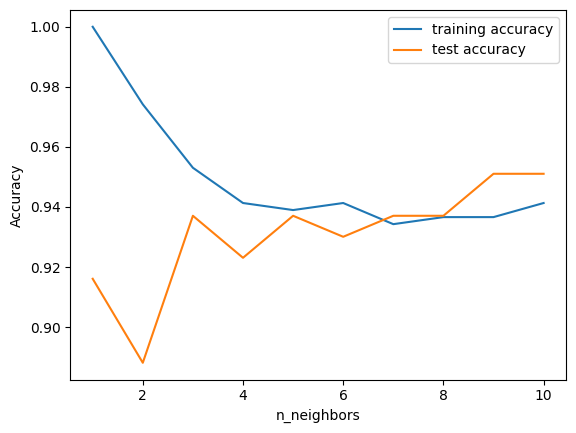

In [5]:
# Plot statistics for each k-neighbors
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

In [6]:
# Load dataset
cancer = load_breast_cancer()
X = pd.DataFrame(cancer.data, columns=cancer.feature_names)
y = cancer.target

In [7]:
# Calculate the correlation matrix
corr_matrix = X.corr().abs()

# Drop highly correlated(98%) features
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.98)]

print("\nFeatures to be removed due to high correlation:")
print(to_drop)

X_reduced = X.drop(columns=to_drop)

X_train, X_test, y_train, y_test=train_test_split(X_reduced, y, stratify=y, random_state=80)


Features to be removed due to high correlation:
['mean perimeter', 'mean area', 'worst perimeter', 'worst area']


In [8]:
training_accuracy = []
test_accuracy = []

neighbors_settings = range(1,11)

# Build the model for k-neighbors 1 to 10
for n_neighbors in neighbors_settings:
    model = KNeighborsClassifier(n_neighbors=n_neighbors)
    model.fit(X_train, y_train)
    training_accuracy.append(model.score(X_train, y_train))
    test_accuracy.append(model.score(X_test, y_test))

Text(0.5, 1.0, 'Accuracy')

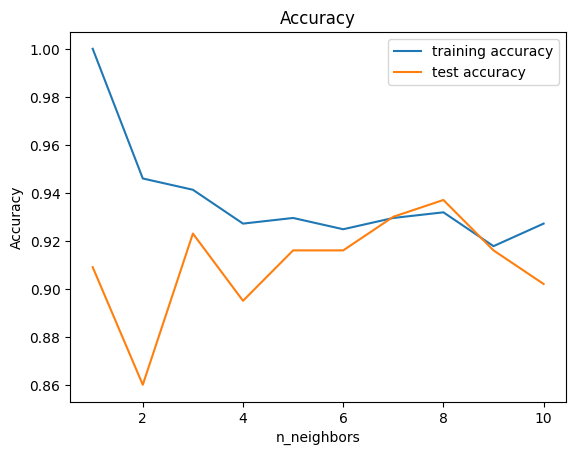

In [9]:
# Plot statistics for each k-neighbors
plt.plot(neighbors_settings, training_accuracy, label = "training accuracy")
plt.plot(neighbors_settings, test_accuracy, label = "test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()
plt.title("Accuracy")

In [10]:
# Define k-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=80)

cv_accuracy = []
cv_mean_accuracy = []

# Train and evaluate KNN classifier for different values of n_neighbors using k-fold cross-validation
for n_neighbors in neighbors_settings:
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    cv_scores = cross_val_score(clf, X_reduced, y, cv=kf)
    cv_accuracy.append(cv_scores)
    cv_mean_accuracy.append(np.mean(cv_scores))

Text(0.5, 1.0, 'K-Fold Cross-Validation')

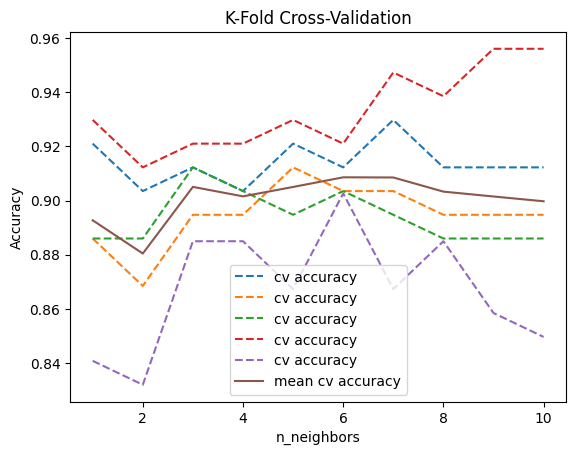

In [10]:
# Plot the k-fold cross-validation results

plt.plot(neighbors_settings, cv_accuracy, '--', label = "cv accuracy")
plt.plot(neighbors_settings, cv_mean_accuracy, label = "mean cv accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()
plt.title("K-Fold Cross-Validation")